# From Data to Action: Machine Learning Approaches for Predicting Tobacco-Free Policy Implementation in Schools 
## SVM Radial 

Loading imputed dataset

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as st

IMAGES_PATH = Path() / "plots"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Read the two dataframes
df = pd.read_csv('/main/tobaccoFree/data/imputed_data.csv')


df.head()

,Dist_Akola,Dist_Amravati,Dist_Chandrapur,Dist_Dhule,Dist_Gondia,Dist_Hingoli,Dist_Jalgaon,Dist_Kolhapur,Dist_Latur,Dist_Nagpur,...,parentEduLevl_50:50%,parentEduLevl_Higher Secondary,parentEduLevl_Higher secondary,parentEduLevl_Literate,"parentEduLevl_Primary, secondary",parentEduLevl_illiterate,parentEduLevl_primary,parentEduLevl_secondary,numBlank,tobaccoFree
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,1.0


## Preparing for the model

Getting x and y variables

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
np.random.seed(42)
X = df.drop(['tobaccoFree'], axis=1)
y = df['tobaccoFree']



Original frequency histogram

In [ ]:
X.hist(figsize = (30,20))
save_fig("unscaled_bar_plot")  
plt.show()

Scaling features data

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))

*scaliling with standardization allows for faster convergence by setting mean to 0 and std dev to 1*

train test split

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train


Perform PCA and Factor Analysis and get feature correlation to Dimensions

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

#Perform PCA
pca = PCA(n_components=2)
X_train2D = pca.fit_transform(X_train)
X_test2D = pca.fit_transform(X_test)

pca4 = PCA(n_components=8)
X_train4D = pca4.fit_transform(X_train)
X_test4D = pca4.fit_transform(X_test)

pca8 = PCA(n_components=8)
X_train8D = pca8.fit_transform(X_train)
X_test8D = pca8.fit_transform(X_test)

# Perform Factor Analysis
famd = FactorAnalysis(n_components=123, max_iter=1000)
X_train_fa = famd.fit_transform(X_train)
X_test_fa = famd.fit_transform(X_test)

# Get the feature names from the dataframe
feature_names = df.drop(['tobaccoFree'], axis=1).columns
n_factors = X_train_fa.shape[1]
# Calculate the correlation coefficients with PCA components
pca_corr = pd.DataFrame(abs(pca.components_.T), columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_names)

# Calculate the correlation coefficients with Factor Analysis components
fa_corr = pd.DataFrame(abs(famd.components_.T), columns=[f'FA{i+1}' for i in range(famd.n_components)], index=feature_names)

Plot the correlation coefficients for PCA (top 11 variables)

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(pca.n_components_):
    top_vars = pca_corr[f'PC{i+1}'].sort_values(ascending=False)[:11]
    top_vars.plot(kind='bar', ax=ax)
    ax.set_title(f'Correlations between Variables and PCA Component 1-{i+1} (Top 11)')
    ax.set_xlabel('Variables')
    ax.set_ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
save_fig('p')
plt.show()

Plot the correlation coefficients for Factor Analysis (top 11 variables)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(n_factors):
    top_vars = fa_corr[f'FA{i+1}'].sort_values(ascending=False)[:11]
    top_vars.plot(kind='bar', ax=ax)
    ax.set_title(f'Correlations between Variables and Factor Analysis Component 1-{i+1} (Top 11)')
    ax.set_xlabel('Variables')
    ax.set_ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
save_fig('s')
plt.show()

Running SVM Models and checking accuracy

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
svm_with_kernel.fit(X_train, y_train) 
y_pred = svm_with_kernel.predict(X_test)
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with Not-Linear SVM: {0:.2f}%".format(precision))

svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
svm_with_kernel.fit(X_train2D, y_train) 
y_pred = svm_with_kernel.predict(X_test2D)
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with Not-Linear SVM + PCA considering only 2 PCs: {0:.2f}%".format(precision))

svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
svm_with_kernel.fit(X_train4D, y_train) 
y_pred = svm_with_kernel.predict(X_test4D)
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with Not-Linear SVM + PCA considering only 4 PCs: {0:.2f}%".format(precision))

svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
svm_with_kernel.fit(X_train8D, y_train) 
y_pred = svm_with_kernel.predict(X_test8D)
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with Not-Linear SVM + PCA considering only 8 PCs: {0:.2f}%".format(precision))

svm_with_kernel = SVC(gamma='auto', kernel='rbf', probability=True)
svm_with_kernel.fit(X_train_fa, y_train) 
y_pred = svm_with_kernel.predict(X_test_fa)
precision = accuracy_score(y_pred, y_test) * 100
print("Accuracy with Not-Linear SVM + FAMD considering n Factors: {0:.2f}%".format(precision))

pred_kfold = cross_val_score(svm_with_kernel, X_train, y_train, cv=10) 
print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

pred_kfold = cross_val_score(svm_with_kernel, X_train2D, y_train, cv=10) 
print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

pred_kfold = cross_val_score(svm_with_kernel, X_train_fa, y_train, cv=10) 
print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))


Accuracy with Not-Linear SVM: 94.31%
Accuracy with Not-Linear SVM + PCA considering only 2 PCs: 91.87%
Accuracy with Not-Linear SVM + PCA considering only 4 PCs: 91.06%
Accuracy with Not-Linear SVM + PCA considering only 8 PCs: 91.06%
Accuracy with Not-Linear SVM + FAMD considering n Factors: 91.87%
Accuracy with SVM and K-FOLD CROSS VALIDATION: 0.98 (+/- 0.04)
Accuracy with SVM and K-FOLD CROSS VALIDATION: 0.92 (+/- 0.05)
Accuracy with SVM and K-FOLD CROSS VALIDATION: 0.94 (+/- 0.03)


Plotting decision boundaries

In [ ]:

plot_decision_regions(X_train, y_train.values.astype(np.int_), clf=svm_with_kernel, legend=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel SVM Decision Boundaries')
save_fig('svm')
plt.show()

Plot Explained Variance Scree Plot

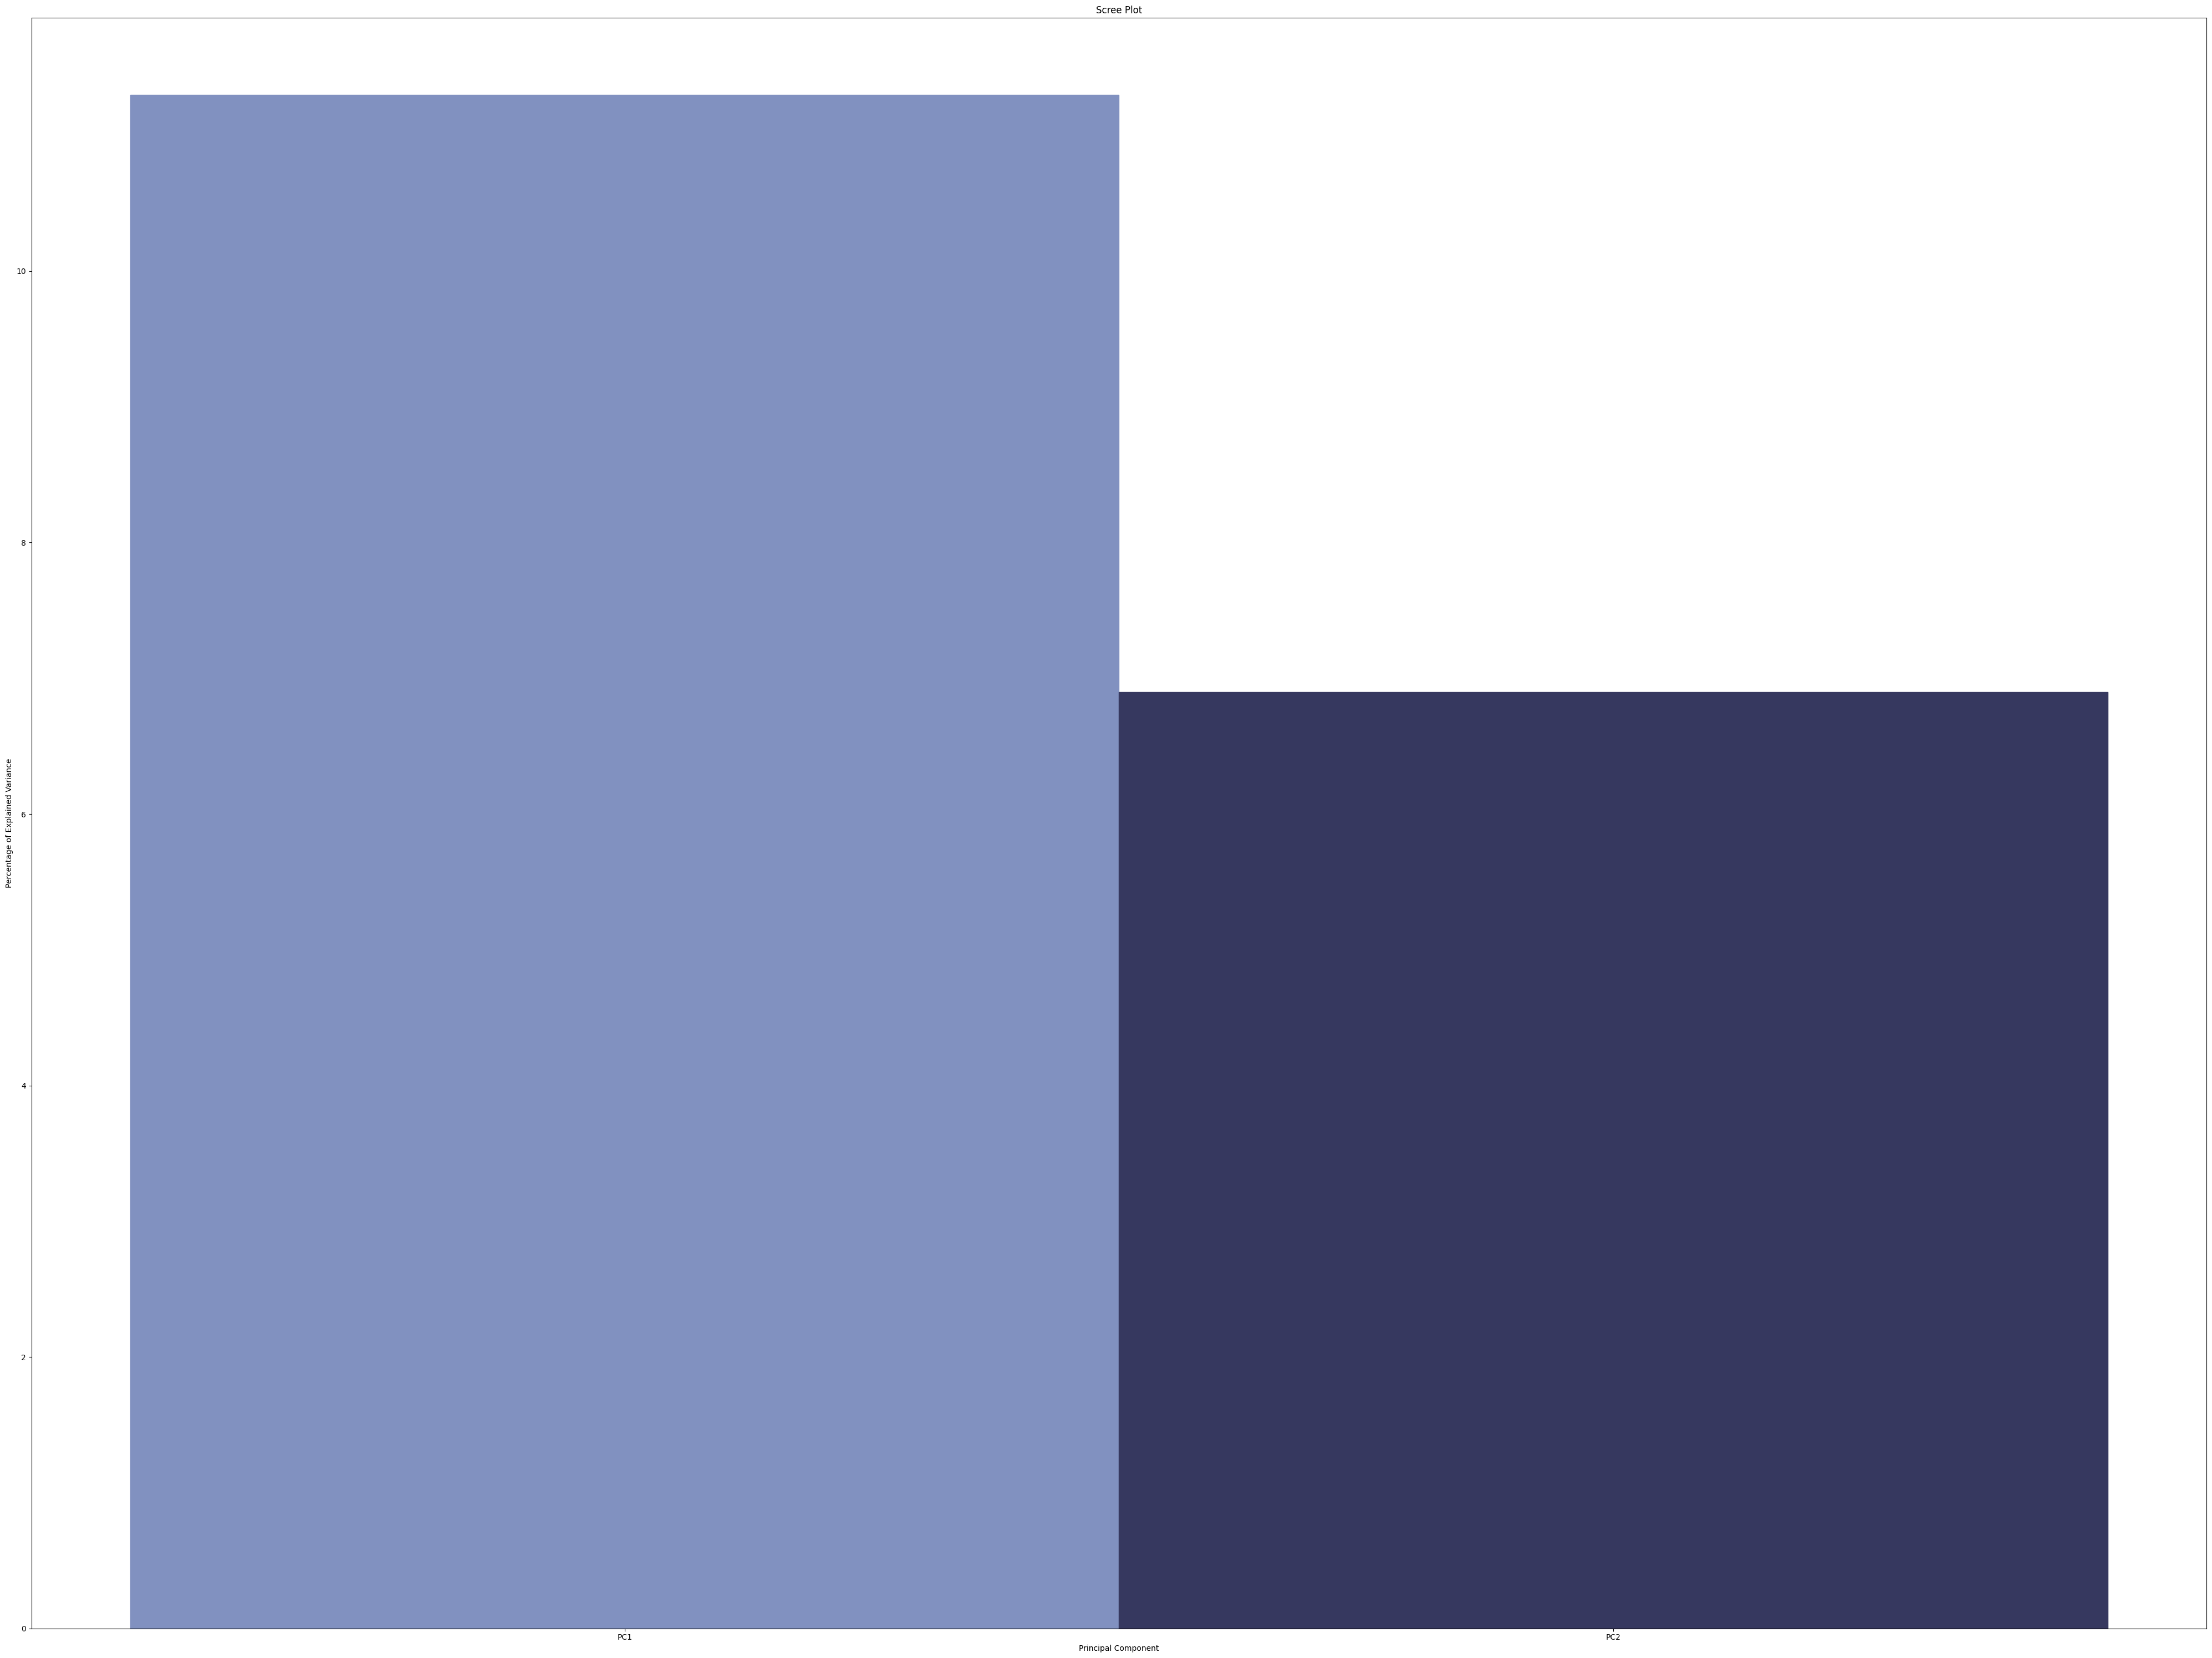

In [24]:
import random
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

fig, ax = plt.subplots(figsize=(40, 30))
for i, bar in enumerate(ax.bar(x=range(1, len(per_var) + 1), height=per_var, width=1, tick_label=labels)):
    # Generate a random RGB color tuple
    color = (random.random(), random.random(), random.random())
    bar.set_color(color)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
save_fig("scree_plot2")  
plt.show()